In [1]:
import PIL
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstatsπ
from tqdm.notebook import tqdm

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from astropy.visualization import hist
from astroML.density_estimation import EmpiricalDistribution

# Pdf of the log

## Let's generate variables and distributions
$$x \rightarrow p(x) = \frac{1}{a-b} \rightarrow \text{uniform between a & b} $$
$$y \rightarrow f(x) = log_{10}(x)$$

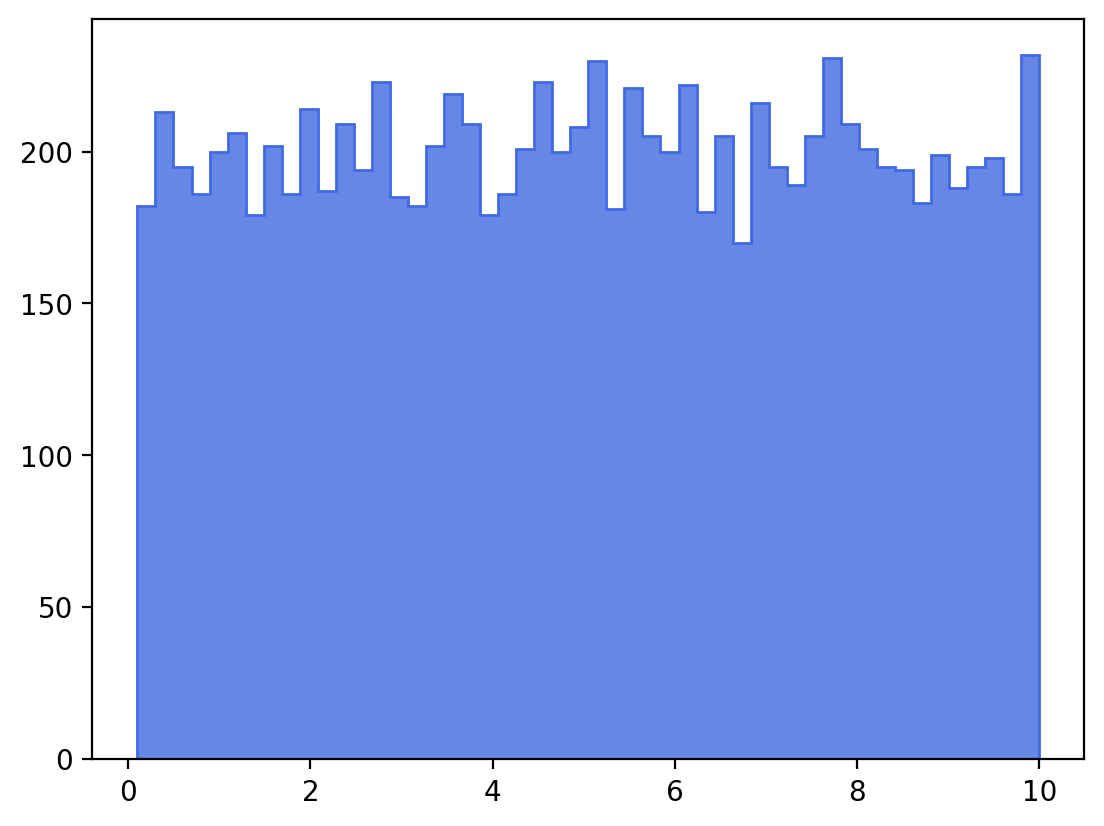

In [2]:
x = np.random.uniform(0.1,10,10000)

counts_x, bins_x, bars_x = plt.hist(x, bins=50, histtype='step',color='royalblue')
plt.hist(x, bins=50, histtype='stepfilled', color='royalblue', alpha=0.8);

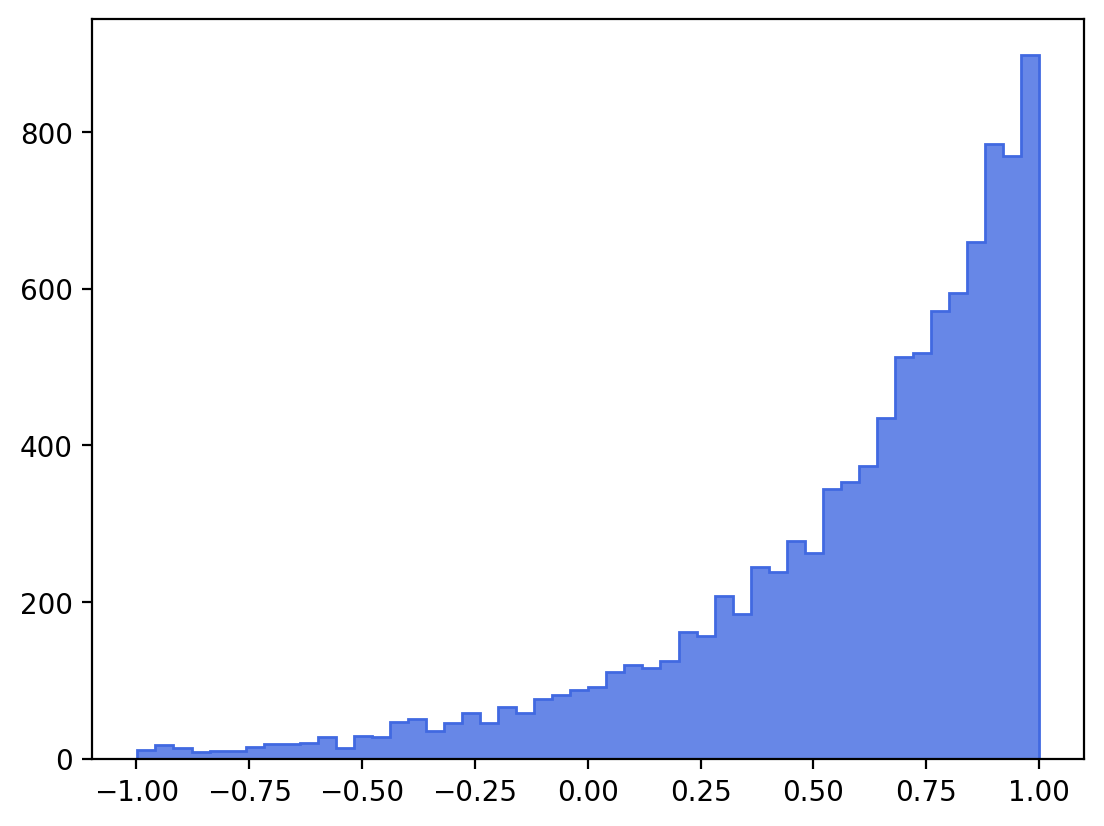

In [3]:
y = np.log10(x)

plt.hist(y, bins=50, histtype='step',color='royalblue')
plt.hist(y, bins=50, histtype='stepfilled', color='royalblue', alpha=0.8);

## Plot the function and marginals distributions

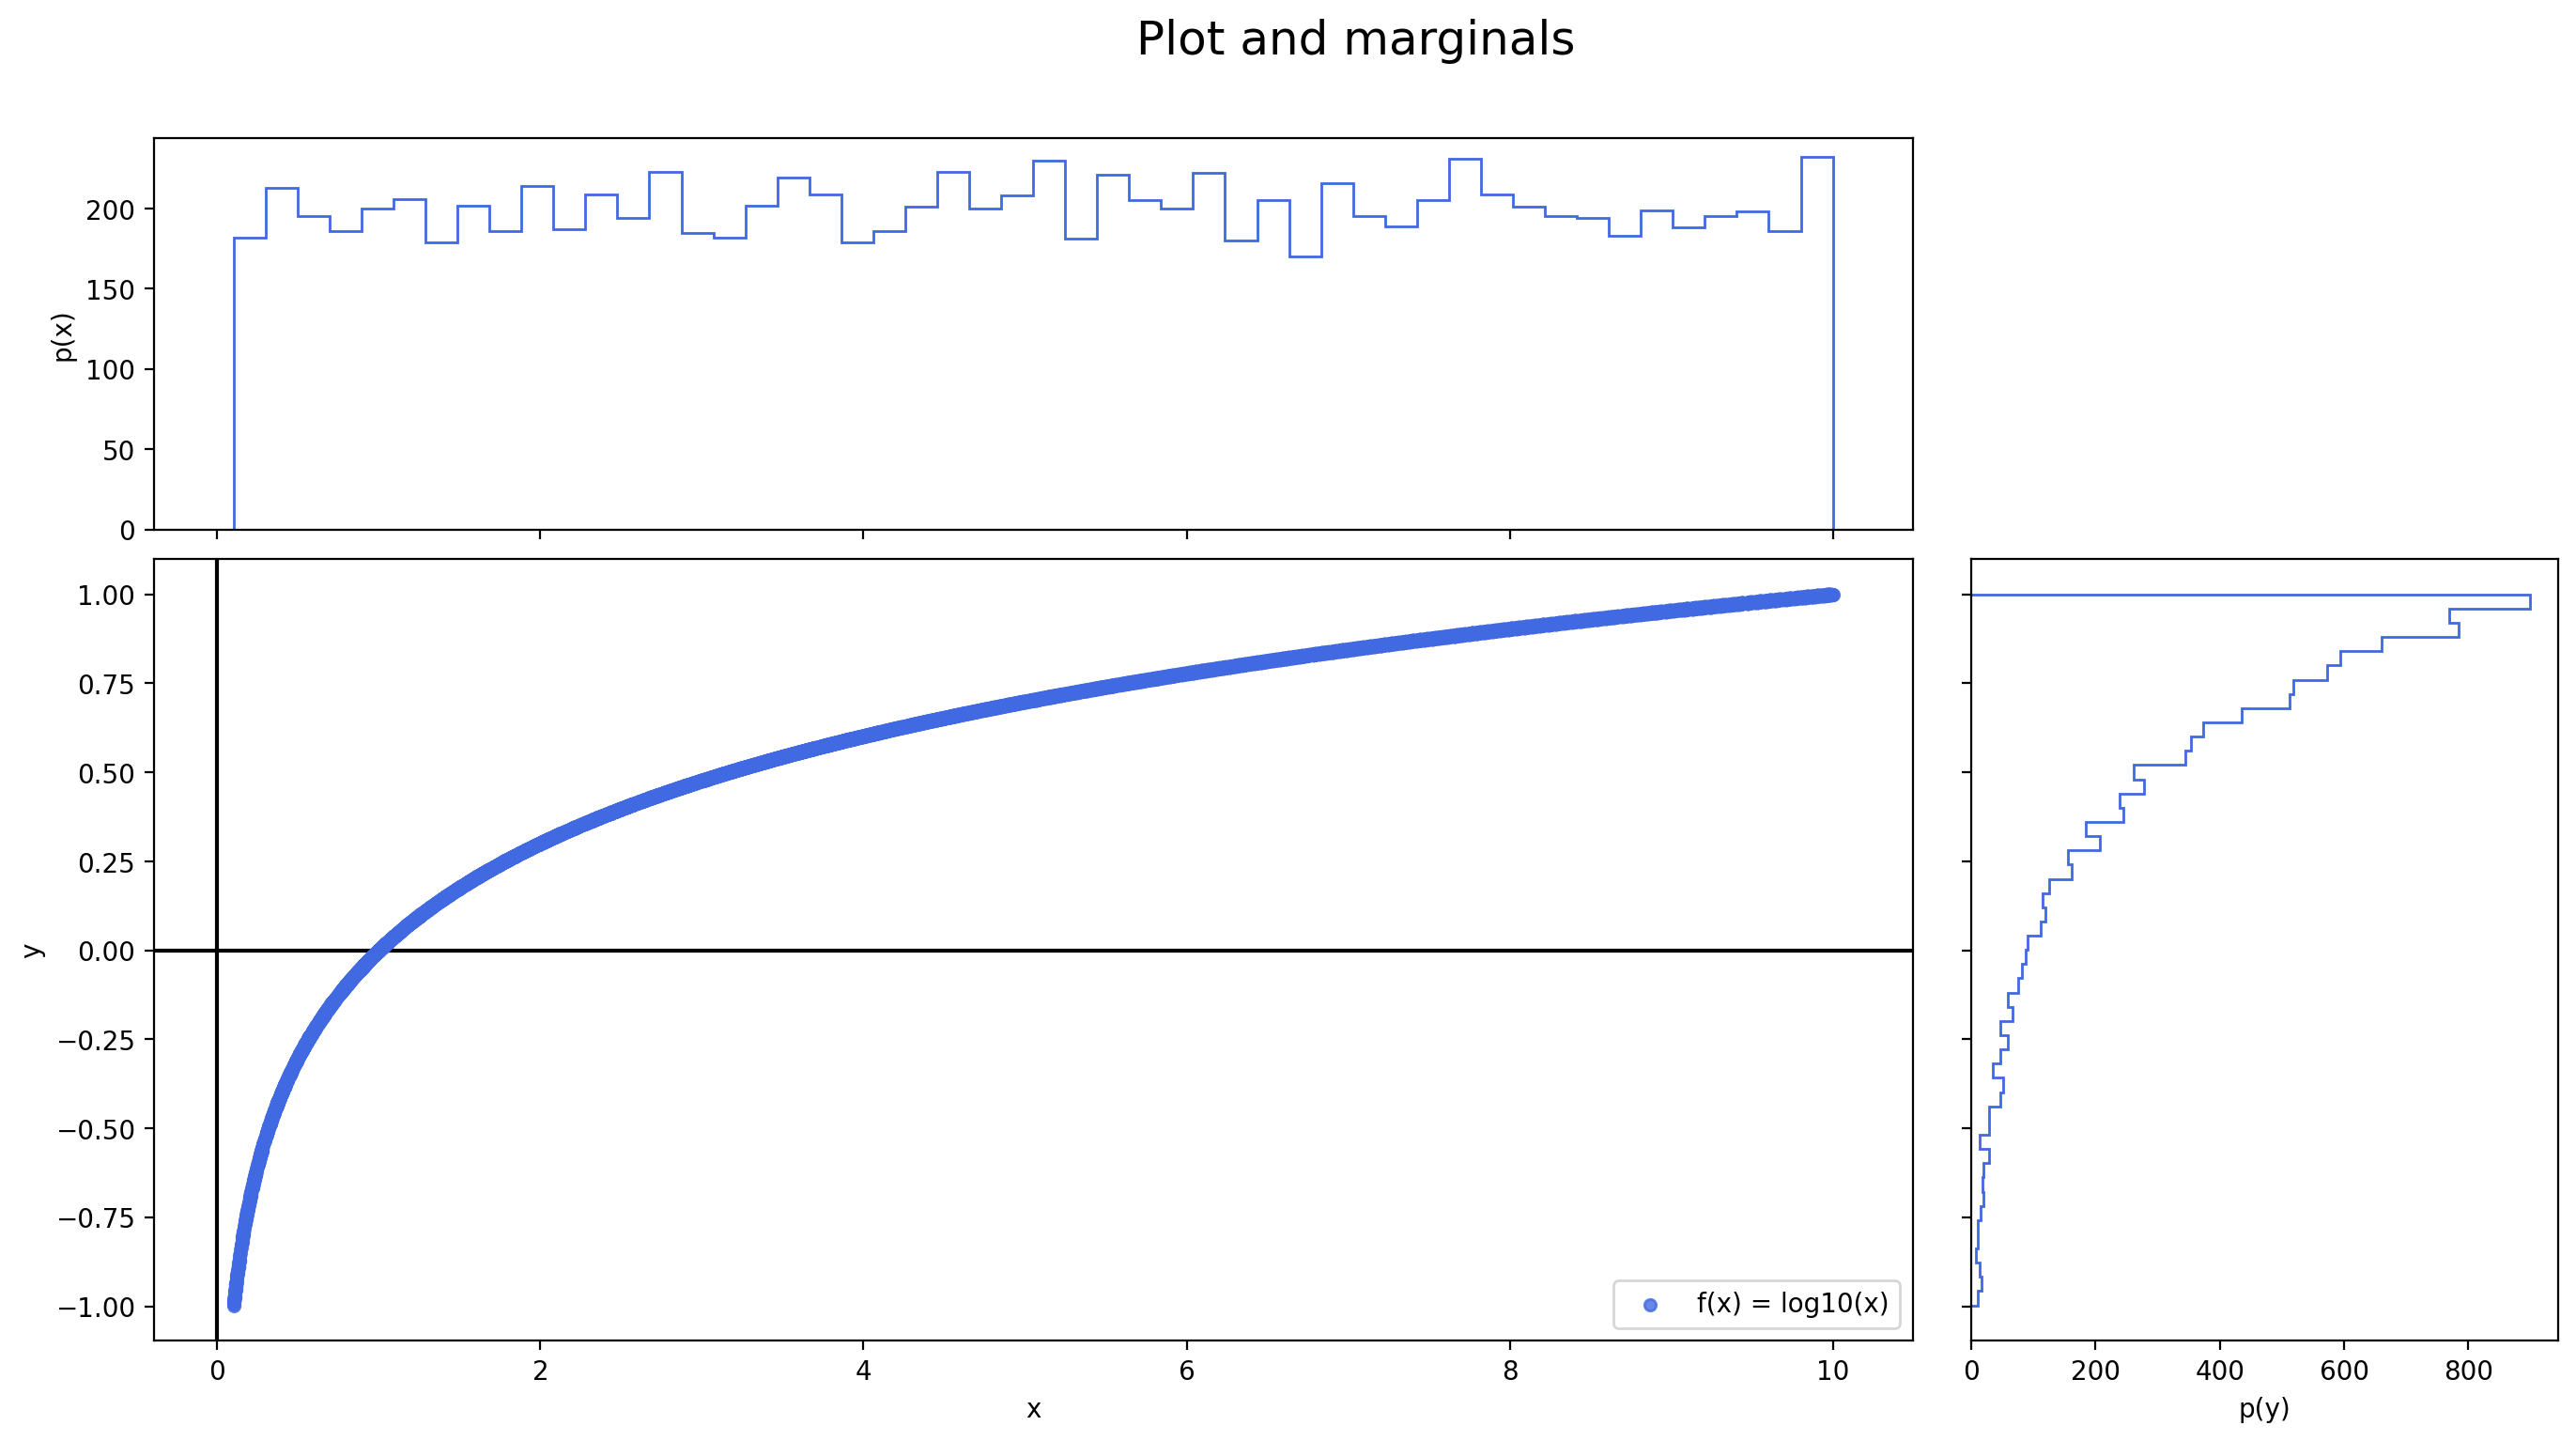

In [4]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x,y, color='royalblue',s=20,alpha=0.8,edgecolors='royalblue', label='f(x) = log10(x)', zorder=1)
    #ax.errorbar(x,y, xerr=x_err,yerr=y_err, fmt="o", ms=6, mec="darkgray", ecolor='darkgray', 
    #            mfc="none", elinewidth=0.8, label='data', zorder=0)
    #ax.set_xscale("log")
    #ax.set_yscale("log")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    #ax.set_xlim(10e-3,10e3)

    #histograms
    ax_histx.hist(x, bins=50,histtype='step',color='royalblue')
    ax_histx.set_ylabel("p(x)")
    ax_histy.hist(y, bins=50,orientation='horizontal',histtype='step',color='royalblue')
    ax_histy.set_xlabel("p(y)")

# Final plot
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Plot and marginals', fontsize=18)

# Add a gridspec with two rows and two columns 
# Also adjust the subplot parameters for a square plot
gs = fig.add_gridspec(2, 2,  width_ratios=(3, 1), height_ratios=(2, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Create the Axes
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# Draw the scatter plot and marginals
scatter_hist(x,y, ax, ax_histx, ax_histy)

ax.axvline(0,color='k', zorder=0)
ax.axhline(0,color='k',zorder=0)
ax.legend();

## Theoretical marginal distribution p(y)

We know that p(x)dx = p(y)dy $$\rightarrow p(y) = |\frac{dy}{dx}|^{-1} p(x) = 0.1 \cdot ln(10) x$$ 

In [5]:
def pdf_x(a, b):
    return 1/(b-a)

def pdf_y(x, pdf_x):
    return x*np.log(10)*pdf_x

In [6]:
pdfx = pdf_x(0.1,10)

pdfy = pdf_y(x, pdfx)
pdfx

0.10101010101010101

### Compute the mean and median

In [20]:
log_mean_x = np.log10(np.mean(x))
mean_y = np.mean(y)

log_median_x = np.log10(np.median(x))
median_y = np.median(y)

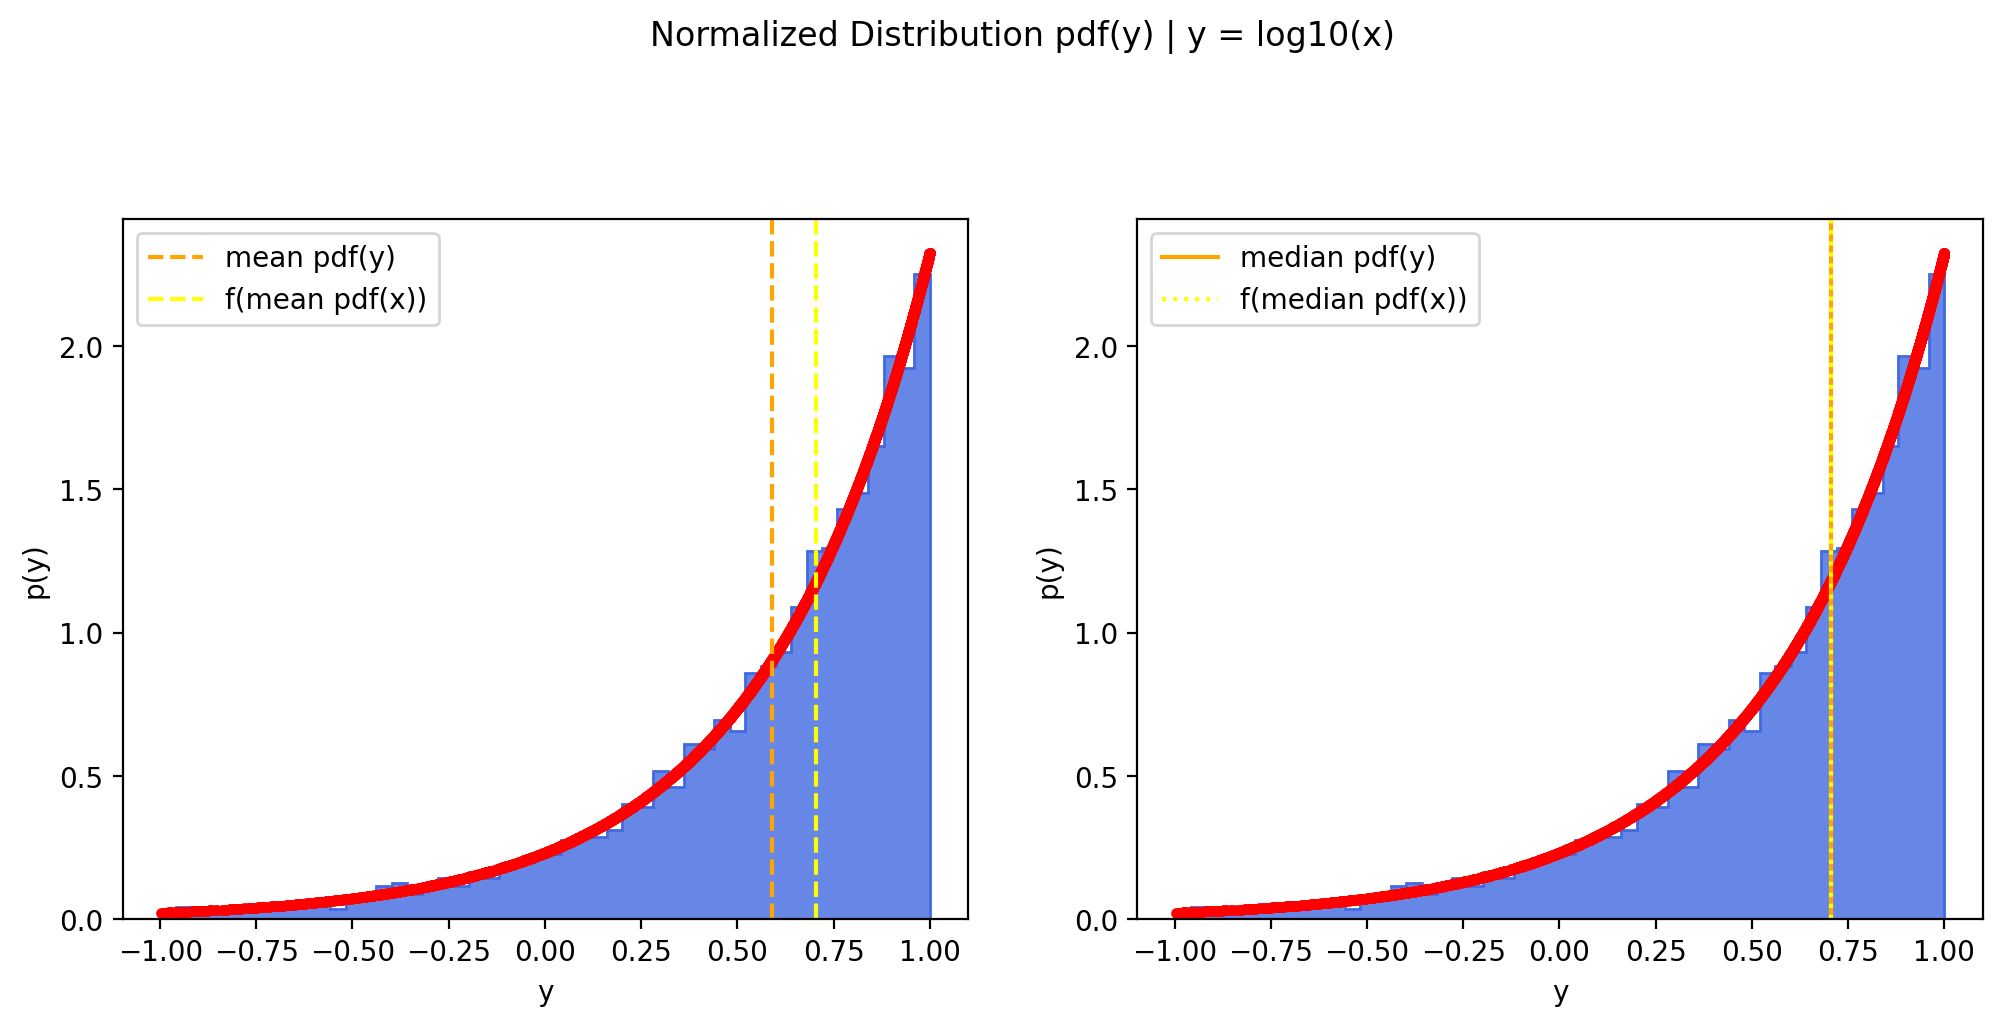

In [65]:
fig = plt.figure(figsize=(12, 10))
fig.suptitle("Normalized Distribution pdf(y) | y = log10(x)")
# plot a histogram of the input
ax = fig.add_subplot(221)

ax.scatter(y,pdfy, color='red', s=8,zorder=2)
hist(y, bins=50, histtype='step',color='royalblue', density=True, zorder=1)
hist(y, bins=50, histtype='stepfilled', color='royalblue', density=True, alpha=0.8, zorder=0)
ax.axvline(mean_y, linestyle='dashed', color='orange', label='mean pdf(y)')
ax.axvline(log_mean_x, linestyle='dashed', color='yellow', label='f(mean pdf(x))')
ax.set_xlabel('y')
ax.set_ylabel('p(y)')
ax.legend()

# plot a histogram of the input
ax = fig.add_subplot(222)

ax.scatter(y,pdfy, color='red', s=8,zorder=2)
hist(y, bins=50, histtype='step',color='royalblue', density=True, zorder=1)
hist(y, bins=50, histtype='stepfilled', color='royalblue', density=True, alpha=0.8, zorder=0)
ax.axvline(median_y, color='orange', label='median pdf(y)')
ax.axvline(log_median_x, linestyle='dotted', color='yellow', label='f(median pdf(x))')
ax.set_xlabel('y')
ax.set_ylabel('p(y)')
ax.legend()

plt.show()

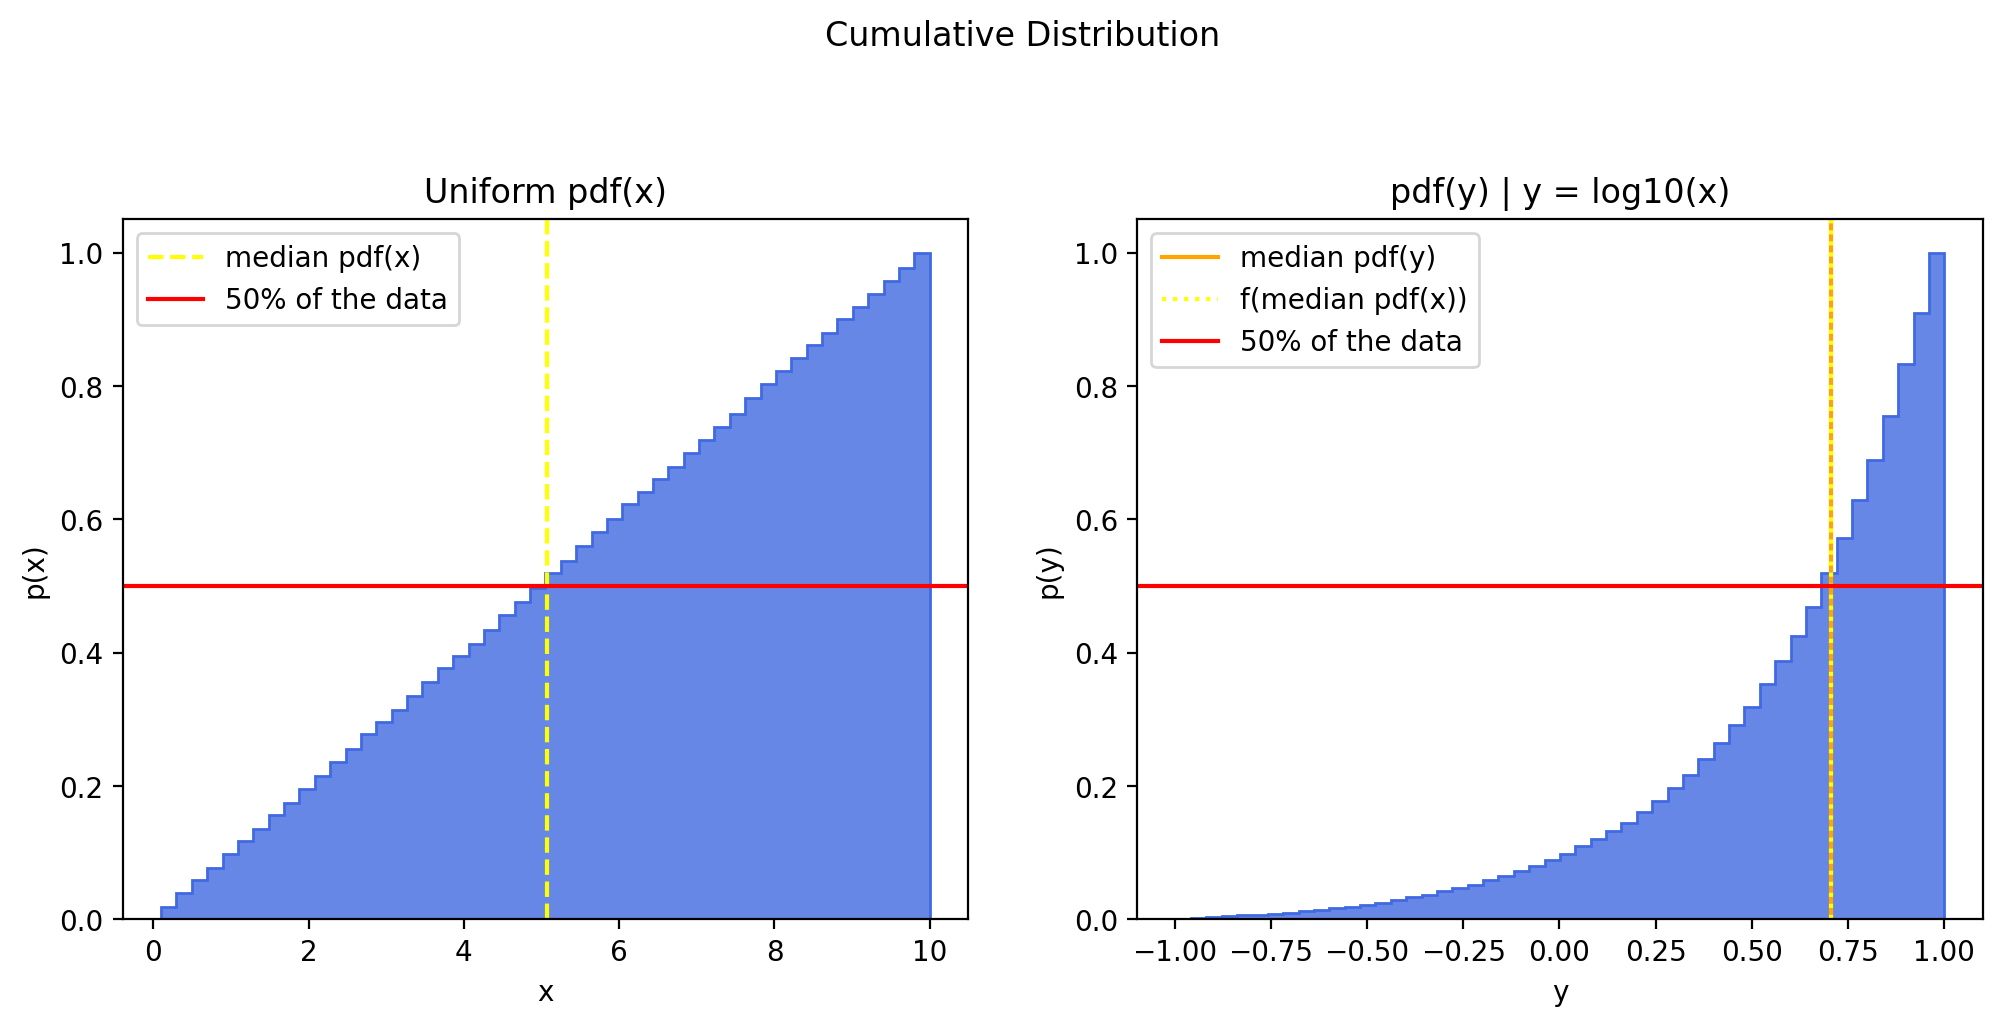

In [64]:
fig = plt.figure(figsize=(12, 10))
fig.suptitle("Cumulative Distribution")
#
#fig.subplots_adjust(hspace=0.3, left=0.1, right=0.95,bottom=0.08, top=0.92, wspace=0.3)

ax = fig.add_subplot(221)

hist(x, bins=50, histtype='step',color='royalblue', density=True, cumulative=True, zorder=1)
hist(x, bins=50, histtype='stepfilled', color='royalblue', density=True, cumulative=True, alpha=0.8, zorder=0)
ax.axvline(np.median(x), linestyle='dashed', color='yellow', label='median pdf(x)')
ax.axhline(0.5, color='r', label='50% of the data')
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.legend()
ax.set_title("Uniform pdf(x)")

# plot a histogram of the input
ax = fig.add_subplot(222)

hist(y, bins=50, histtype='step',color='royalblue', density=True, cumulative=True, zorder=1)
hist(y, bins=50, histtype='stepfilled', color='royalblue', density=True, cumulative=True, alpha=0.8, zorder=0)
ax.axvline(median_y, color='orange', label='median pdf(y)')
ax.axvline(log_median_x, linestyle='dotted', color='yellow', label='f(median pdf(x))')
ax.axhline(0.5, color='r', label='50% of the data')
ax.set_xlabel('y')
ax.set_ylabel('p(y)')
ax.set_title("pdf(y) | y = log10(x)")
ax.legend()

plt.show()

## Mean and median of a distribution

We have that for the means $\mu$ of the distributions:

1) mean y $\rightarrow$ mean of the y distribution $ \mu_{y} = <y> = \frac{1}{N}\sum_{i=1}^N{y_i}$
2) log of the mean x $\rightarrow$ mean of the x distribution $ \mu_{x} = <x> = \frac{1}{N}\sum_{i=1}^N{x_i} \rightarrow y(<x>)= f(\mu_x) = log_{10}(\mu_x)$

$$ $$

And for the medians $\mu e$, where $H$ is the cumulative distribution:

1) median y $\rightarrow$ value at which I have 50% of the data $\rightarrow \mu e_y = y$  |  $H(y) = 0.5$
2) log of the median x $\rightarrow \mu e_x = x$ | $H(x) = 0.5 \rightarrow y(\mu e_x) = log_{10} (\mu e_x)$ | $H(y(\mu e_x)) = 0.5$

$$ $$

As expected, it is possible to notice that means $\mu$ are affected by outliers, whereas the median $\mu e$ is a more robust estimator: 

$$\Longrightarrow 
\begin{cases}
\mu_y \neq y(\mu_x) \\
\mu e_y = y(\mu e_x) 
\end{cases}
$$ 


in fact the median of a distribution only depends on the ordering of the elements and performing a log does not change the order of a sampling